# Práctica Classical Neuronal Networks

* Alejandro Mayorga
* Fernando Mondragón

En esta práctica, trataremos de desarrollar una red neuronal que permita la correcta clasificación del dataset Fashion-MNIST. Se probarán diferentes modelos a fin de encontrar aquel que realice mejor el trabajo propuesto. Además, también se aplicarán diversas técnicas de regularización, con el fin de mejorar los resultados obtenidos en primera instancia.

In [2]:
#Primer paso: Cargar la database y distribuir las imágenes de entrenamiento y evaluación

from tensorflow . keras . datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


#A mayores, cargamos la librería responsable de representar nuestras gráficas

import matplotlib.pyplot as plt




2023-11-27 13:22:44.406000: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 13:22:44.451273: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 13:22:44.652984: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 13:22:44.653029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 13:22:44.684980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Preprocesado

Para comenzar tenemos que cargar el dataset y preprocesar los datos para introducirlos en los modelos.
Para ello, primero convertimos las imágenes en vectores unidimensionales y después, normalizamos los valores en el intervalo [0,1]

In [3]:
#Primeramente, tenemos que preparar los datos de forma que sean fácilmente introducibles en nuestra red. Esto
#implica reorganizar el array original en el que se nos es dada la información, así como para su tipo de datos a
#float
( x_train , y_train ), ( x_test , y_test ) = fashion_mnist . load_data ()
train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255



Ahora partimos los datos de entrenamiento en entrenamiento y validación para poder comparar el resultado de los diferentes modelos a probar sin tener que ver los casos de test.

In [4]:
#Creamos un tercer grupo de validación


validation_images = train_images[:10000] # Copy of x_train from the begining (0) to 9999
validation_labels = y_train[:10000]




final_training_images = train_images.copy()
train_images = train_images[10000:] # Copy of x_train from 10000 to the end
train_labels = y_train[10000:]

Finalmente, el último paso de preprocesado, es codificar las etiquetas de entrenamiento, validación y testing con one-hot
encoding, resultando en que cada una de estas se transforma en un array de vectores de 10 elementos.

In [5]:
#Realizamos one-hot enconding para así disponer las etiquetas de forma que la red pueda entrenar

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(y_test)
final_training_labels = to_categorical(y_train)


## Diseño y entrenamiento de las redes de neuronas artificiales

Para hallar los mejores hiperparámetros de las redes recurriremos a una Grid Search, es decir, explorar completamente el espacio de hiperparámetros definido. Esto es un proceso costoso, y como se podrá ver más adelante, seguramente podríamos haber obtenido resultados iguales con una Random Search.

En cuanto a los hiperparámetros a probar, nos hemos decantado por los siguientes:

1. __Estructurales__
* __Neuronas por capa__: Hemos probado con 16, 64 y 128 neuronas por capa.
* __Número de capas__: Se utilizan 1 ó 2 capas. En el caso de usar 2 capas, estas son iguales
* __Funciones de activación__: Utilizamos la función "relu" en las capas intermedias y "softmax" en la de salida

2. __De aprendizaje__
* __Optimizador__: Hemos optado por los optimizadores "rmsprop" y "Adam".
* __Learning rate__: Utilizamos learning rates de 0.1, 0.01 y 0.001 siendo este último el valor por defecto de los optimizadores.
* __Número de epochs__: Probamos con 10 y 30 epochs. Al no utilizar early stopping, no querémos un número de epochs muy alto para reducir el tiempo de entrenamiento, pero por si no fueran 10 epochs suficientes, hemos añadido un valor superior. 
* __batch size__: Para este apartado escogemos los valores de 32 y 512. A más pequeño sea el batch size, más actualizaciones de los pesos se harán por lo que el modelo tardará mas en aprender, y es posible que haga mas overfitting ya que con batch sizes más grandes, generaliza más.
* __métricas__: Las métricas escogidas son accuracy como métrica principal, y la categorical cross entropy como función de perdida.

In [5]:
#Opciones a probar

epoch_n = [10,30]
batch_size_n = [32,512]

layers_n = [1,2]
neurons_n = [16,64,128]
learning_rates = [0.1,0.01,0.001]
optimizers = ["rmsprop","Adam"]



Una vez definidos los hiperparámetros a probar, toca explorar ese espacio. Para ello vamos iterando en las listas de hiperparámetros probando todas las combinaciones, y vamos quedándonos con una lista con las accuracies de cada modelo, y otra con los hiperparámetros de dicho modelo para poder recuperar el mejor más adelante.

Accuracy =  0.10220000147819519
counter: 1
Accuracy =  0.3237000107765198
counter: 2
Accuracy =  0.8302000164985657
counter: 3
Accuracy =  0.8564000129699707
counter: 4
Accuracy =  0.8652999997138977
counter: 5
Accuracy =  0.8658999800682068
counter: 6
Accuracy =  0.444599986076355
counter: 7
Accuracy =  0.33070001006126404
counter: 8
Accuracy =  0.8468000292778015
counter: 9
Accuracy =  0.8557999730110168
counter: 10
Accuracy =  0.883400022983551
counter: 11
Accuracy =  0.8858000040054321
counter: 12
Accuracy =  0.45239999890327454
counter: 13
Accuracy =  0.4059999883174896
counter: 14
Accuracy =  0.8561999797821045
counter: 15
Accuracy =  0.8626999855041504
counter: 16
Accuracy =  0.8845000267028809
counter: 17
Accuracy =  0.8920999765396118
counter: 18
Accuracy =  0.10270000249147415
counter: 19
Accuracy =  0.10270000249147415
counter: 20
Accuracy =  0.8312000036239624
counter: 21
Accuracy =  0.8471999764442444
counter: 22
Accuracy =  0.8704000115394592
counter: 23
Accuracy =  0.866

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


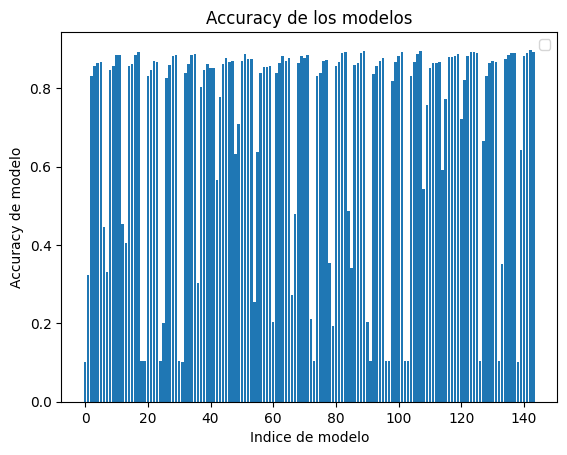

In [20]:


#Ahora loopeamos por los hiperparametros
#2*2*2*3*3*2 = 144 modelos. Aproximadamente 15s por modelo, aprox 40 min para probar todos


counter = 0
list_acc = []
list_opt = []
for epoch in epoch_n: 
    for batch in batch_size_n:
        for capas in layers_n: 
            for neurons in neurons_n: 
                for learning_r in learning_rates:
                    for optimizador in optimizers: 
                        model = keras.Sequential()

                        model.add(layers.Input(shape=(784, )))
                        for i in range(capas):
                            model.add(layers.Dense(neurons, activation="relu"))

                        model.add(layers.Dense(10, activation="softmax"))
                        
                        if optimizador =="rmsprop":
                            opt = keras.optimizers.RMSprop(learning_rate=learning_r)
                        if optimizador =="Adam":
                            opt = keras.optimizers.Adam(learning_rate=learning_r)
                        
                        model.compile(optimizer=opt, 
                                  loss="categorical_crossentropy",
                                  metrics=["accuracy"])

                        history =model.fit(train_images, train_labels, epochs=epoch,verbose=0, batch_size=batch, 
                            validation_data = (validation_images, validation_labels))
                        
                        history_dict = history.history
                        result_val = max(history_dict['val_accuracy'])
                        print("Accuracy = ",result_val)
                        
#Guardamos todos los modelos  if result[0]< result_val:
                        list_acc+=[result_val]
                                  
                        list_opt+= ["epoch: "+ str(epoch)+ "\n batch: " +str(batch)+ "\n layers: " +str(capas)+ "\n neurons: " 
                                    +str(neurons)+ "\n learning rate: " +str(learning_r) +" optimizador: " +optimizador]                     
                        counter +=1
                        print("counter:",counter)     






#Mostramos los resultados de las accuracies obtenidas para cada modelo


plt.bar(range(len(list_acc)), list_acc)

plt.title('Accuracy de los modelos')
plt.xlabel('Indice de modelo')
plt.ylabel('Accuracy de modelo')
plt.legend()
plt.show()




Como podemos observar, muchos modelos han dado resultados muy similares, por lo que seguramente habríamos encontrado alguno de esos modelos con una
búsqueda aleatoria del espacio de hiperparámentros, permitiéndonos ahorrar tiempo o en el mismo tiempo haber explorado un espacio más grande.

De cualquier forma, ahora nos interesa recuperar los mejores modelos y sus opciones. En el siguiente fragmento de código recuperamos y e imprimimos los mejores 5 modelos junto a sus opciones, así como los peores 5.

In [23]:
#Nos quedamos con los 5 mejores y peores modelos

cut = 5

bottom = sorted(range(len(list_acc)), key=lambda i: list_acc[i], reverse=True)[-cut:]
top = sorted(range(len(list_acc)), key=lambda i: list_acc[i])[-cut:]



for x in range(cut):
    print("Top ", cut-x, " model: Nº = ", top[x],"Accuracy = ",list_acc[top[x]], "options: \n", list_opt[top[x]])
    
for y in range(cut):  
    print("Bottom ", cut-y, " model:Nº = ", bottom[x],"Accuracy = ",list_acc[bottom[x]], "options: \n ", list_opt[bottom[y]])






Top  5  model: Nº =  124 Accuracy =  0.8924000263214111 options: 
 epoch: 30
 batch: 512
 layers: 1
 neurons: 128
 learning rate: 0.001 optimizador: rmsprop
Top  4  model: Nº =  101 Accuracy =  0.8924999833106995 options: 
 epoch: 30
 batch: 32
 layers: 2
 neurons: 64
 learning rate: 0.001 optimizador: Adam
Top  3  model: Nº =  89 Accuracy =  0.8946999907493591 options: 
 epoch: 30
 batch: 32
 layers: 1
 neurons: 128
 learning rate: 0.001 optimizador: Adam
Top  2  model: Nº =  107 Accuracy =  0.8960000276565552 options: 
 epoch: 30
 batch: 32
 layers: 2
 neurons: 128
 learning rate: 0.001 optimizador: Adam
Top  1  model: Nº =  142 Accuracy =  0.8980000019073486 options: 
 epoch: 30
 batch: 512
 layers: 2
 neurons: 128
 learning rate: 0.001 optimizador: rmsprop
Bottom  5  model:Nº =  31 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 512
 layers: 2
 neurons: 16
 learning rate: 0.1 optimizador: rmsprop
Bottom  4  model:Nº =  31 Accuracy =  0.10220000147819519 options: 
  ep

Empezando por los peores resultados, podemos identificar que el learning rate = 0.1 ha sido un factor común a todos ellos. Un valor tan alto
ha impedido al modelo aprender.

En cuanto al top 5, encontramos un poco de todo. Tenemos redes con 1 o 2 capas, 64 o 128 neuronas y distintos optimizadores. Lo que si que comparten
los mejores modelos es el learning rate = 0.001 y los 30 epoch.

Nos quedamos con el mejor modelo obtenido en la ejecución actual (la cual dejamos comentada en el siguiente recuadro de código) y trabajaremos en las
siguientes secciones con estos datos.

Top  1  model: Nº =  142 Accuracy =  0.8980000019073486 options: 
 epoch: 30
 batch: 512
 layers: 2
 neurons: 128
 learning rate: 0.001 optimizador: rmsprop

In [ ]:
"""
Top  5  model: Nº =  124 Accuracy =  0.8924000263214111 options: 
 epoch: 30
 batch: 512
 layers: 1
 neurons: 128
 learning rate: 0.001 optimizador: rmsprop
Top  4  model: Nº =  101 Accuracy =  0.8924999833106995 options: 
 epoch: 30
 batch: 32
 layers: 2
 neurons: 64
 learning rate: 0.001 optimizador: Adam
Top  3  model: Nº =  89 Accuracy =  0.8946999907493591 options: 
 epoch: 30
 batch: 32
 layers: 1
 neurons: 128
 learning rate: 0.001 optimizador: Adam
Top  2  model: Nº =  107 Accuracy =  0.8960000276565552 options: 
 epoch: 30
 batch: 32
 layers: 2
 neurons: 128
 learning rate: 0.001 optimizador: Adam
Top  1  model: Nº =  142 Accuracy =  0.8980000019073486 options: 
 epoch: 30
 batch: 512
 layers: 2
 neurons: 128
 learning rate: 0.001 optimizador: rmsprop
Bottom  5  model:Nº =  31 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 512
 layers: 2
 neurons: 16
 learning rate: 0.1 optimizador: rmsprop
Bottom  4  model:Nº =  31 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 512
 layers: 2
 neurons: 64
 learning rate: 0.1 optimizador: rmsprop
Bottom  3  model:Nº =  31 Accuracy =  0.10220000147819519 options: 
  epoch: 30
 batch: 512
 layers: 2
 neurons: 128
 learning rate: 0.1 optimizador: rmsprop
Bottom  2  model:Nº =  31 Accuracy =  0.10220000147819519 options: 
  epoch: 10
 batch: 32
 layers: 1
 neurons: 16
 learning rate: 0.1 optimizador: rmsprop
Bottom  1  model:Nº =  31 Accuracy =  0.10220000147819519 options: 
  epoch: 10
 batch: 32
 layers: 2
 neurons: 128
 learning rate: 0.1 optimizador: Adam
 """

Una vez obtenido el mejor modelo, vamos a verlo de forma gráfica.

Epoch 1/30
98/98 [==============================] - 1s 5ms/step - loss: 0.7768 - accuracy: 0.7256 - val_loss: 0.5438 - val_accuracy: 0.8142
Epoch 2/30
98/98 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.8156 - val_loss: 0.4734 - val_accuracy: 0.8272
Epoch 3/30
98/98 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8365 - val_loss: 0.4168 - val_accuracy: 0.8490
Epoch 4/30
98/98 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8515 - val_loss: 0.4065 - val_accuracy: 0.8546
Epoch 5/30
98/98 [==============================] - 0s 3ms/step - loss: 0.3804 - accuracy: 0.8597 - val_loss: 0.3787 - val_accuracy: 0.8611
Epoch 6/30
98/98 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8676 - val_loss: 0.3815 - val_accuracy: 0.8589
Epoch 7/30
98/98 [==============================] - 0s 4ms/step - loss: 0.3414 - accuracy: 0.8741 - val_loss: 0.3434 - val_accuracy: 0.8709
Epoch 8/30
98/98 [==

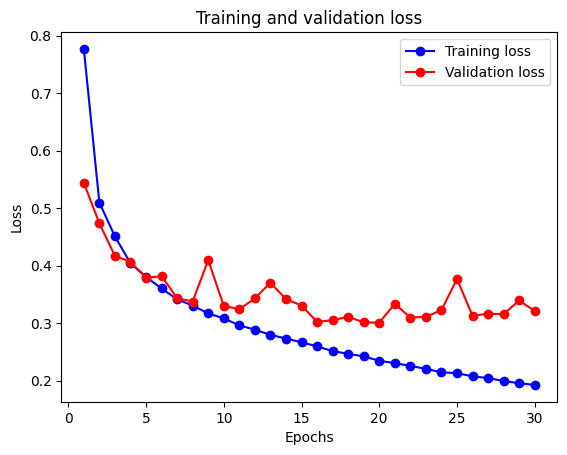

In [13]:
#Grafiqueamos la funcion de perdida y la accuracy del mejor modelo.


best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,validation_data = (validation_images, validation_labels))




history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Se puede observar que desde el epoch 8, los resultados de validación no mejoran.
Ahora, para ver la acuraccy real del modelo, vamos a entrenarlo con los datos de entrenamiento y validación juntos, y evaluarlo con los de testing.

In [9]:


#Ahora ejecutamos el modelo sobre los datos de test para ver su accuracy real
best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)
#TODO Definir el modelo que mejor resultado de y reentrenarlo

results = best_model.evaluate(test_images, test_labels)

print(results)


Epoch 1/30
118/118 [==============================] - 1s 4ms/step - loss: 0.7430 - accuracy: 0.7405 - val_loss: 0.5560 - val_accuracy: 0.8008
Epoch 2/30
118/118 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.8233 - val_loss: 0.4736 - val_accuracy: 0.8257
Epoch 3/30
118/118 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8465 - val_loss: 0.4211 - val_accuracy: 0.8422
Epoch 4/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8564 - val_loss: 0.3837 - val_accuracy: 0.8614
Epoch 5/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3628 - accuracy: 0.8661 - val_loss: 0.4058 - val_accuracy: 0.8515
Epoch 6/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8736 - val_loss: 0.3334 - val_accuracy: 0.8765
Epoch 7/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8786 - val_loss: 0.3022 - val_accuracy: 0.8890
Epoch 

La acuracy final obtenida es 0.87879.

# REGULARIZACIÓN
Ahora vamos a probar algunos de los modelos anteriores utilizando las técnicas de regularización de "dropout" y "batch normalization" para tratar de obtener mejores resultados.

## Dropout

Primero probaremos el método de Dropout. Utilizaremos un 20% de dropout.

In [14]:
#dropout
#Vamos a probar a añadir a este modelo dropout.
#Definir modelo y para implementar el dropout, añadir las capas de Dropout

best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, activation="relu"))
    best_model.add(layers.Dropout(0.2))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,validation_data = (validation_images, validation_labels))


results = best_model.evaluate(test_images, test_labels)

print(results)

#Ejecutar 3 o 4 modelos entre los que esté el mejor obtenido anteriormente

Epoch 1/30
98/98 [==============================] - 1s 5ms/step - loss: 0.8597 - accuracy: 0.7014 - val_loss: 0.5230 - val_accuracy: 0.8141
Epoch 2/30
98/98 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.8065 - val_loss: 0.4793 - val_accuracy: 0.8240
Epoch 3/30
98/98 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.8290 - val_loss: 0.4226 - val_accuracy: 0.8431
Epoch 4/30
98/98 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.8437 - val_loss: 0.3833 - val_accuracy: 0.8588
Epoch 5/30
98/98 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8498 - val_loss: 0.3709 - val_accuracy: 0.8648
Epoch 6/30
98/98 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8590 - val_loss: 0.3666 - val_accuracy: 0.8666
Epoch 7/30
98/98 [==============================] - 0s 5ms/step - loss: 0.3744 - accuracy: 0.8626 - val_loss: 0.3765 - val_accuracy: 0.8637
Epoch 8/30
98/98 [==

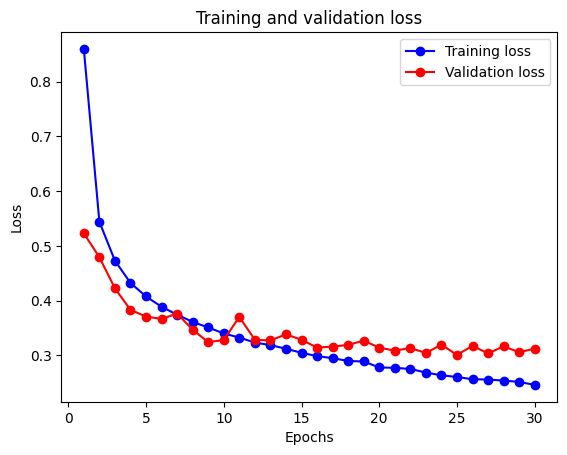

In [15]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss (dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

En la gráfica, podemos apreciar como no se han producido cambios significativos en el largo plazo, si bien la la variación entre epochs para los resultados de validación varían menos entre iteraciones. Pasemos ahora a probarlo sobre el conjunto de test.

In [6]:

best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, activation="relu"))
    best_model.add(layers.Dropout(0.2))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)


results = best_model.evaluate(test_images, test_labels)

print(results)

#Ejecutar 3 o 4 modelos entre los que esté el mejor obtenido anteriormente

Epoch 1/30
118/118 [==============================] - 1s 4ms/step - loss: 0.7970 - accuracy: 0.7219
Epoch 2/30
118/118 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.8165
Epoch 3/30
118/118 [==============================] - 0s 4ms/step - loss: 0.4463 - accuracy: 0.8387
Epoch 4/30
118/118 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8512
Epoch 5/30
118/118 [==============================] - 0s 4ms/step - loss: 0.3883 - accuracy: 0.8584
Epoch 6/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8650
Epoch 7/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8691
Epoch 8/30
118/118 [==============================] - 0s 4ms/step - loss: 0.3468 - accuracy: 0.8740
Epoch 9/30
118/118 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8767
Epoch 10/30
118/118 [==============================] - 0s 4ms/step - loss: 0.3258 - accuracy: 0.8808

### Resultados del dropout

El resultado del accuracy para esta técnica es de 0.8781. Haciendo que sea prácticamente idéntico al valor obtenido sin regularización.

## Batch normalization

De forma similar al caso anterior, implementamos la batch regularization añadiendo capas intermedias de regularización.


In [7]:
#batch normalization



best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, activation="relu"))
    best_model.add(layers.BatchNormalization())
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,validation_data = (validation_images, validation_labels))



print(results)



Epoch 1/30
98/98 [==============================] - 1s 7ms/step - loss: 0.5305 - accuracy: 0.8139 - val_loss: 0.8352 - val_accuracy: 0.7880
Epoch 2/30
98/98 [==============================] - 0s 5ms/step - loss: 0.3661 - accuracy: 0.8686 - val_loss: 0.4799 - val_accuracy: 0.8355
Epoch 3/30
98/98 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.8812 - val_loss: 0.3860 - val_accuracy: 0.8659
Epoch 4/30
98/98 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.8921 - val_loss: 0.4001 - val_accuracy: 0.8545
Epoch 5/30
98/98 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.8983 - val_loss: 0.3926 - val_accuracy: 0.8494
Epoch 6/30
98/98 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.9054 - val_loss: 0.3807 - val_accuracy: 0.8630
Epoch 7/30
98/98 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.9097 - val_loss: 0.3651 - val_accuracy: 0.8686
Epoch 8/30
98/98 [==

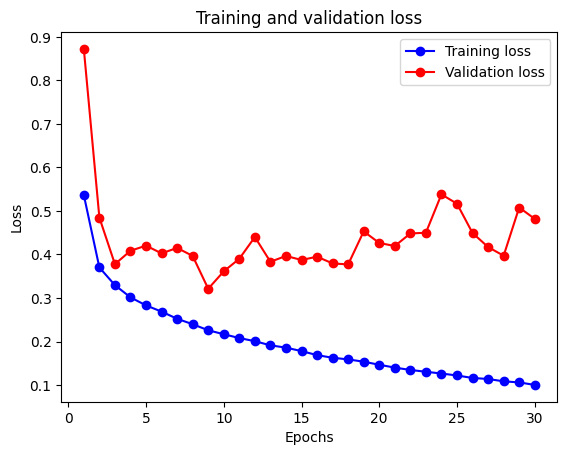

In [17]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Los valores obtenidos para el conjunto de validación son extremadamente fluctuantes. Se aprecia fácilmente que la 
función de pérdida a partir de la tercera iteración, comienza poco a poco a empeorar.

In [9]:
#batch normalization


best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, activation="relu"))
    best_model.add(layers.BatchNormalization())
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)


results = best_model.evaluate(test_images, test_labels)

print(results)



Epoch 1/30
118/118 [==============================] - 1s 4ms/step - loss: 0.5153 - accuracy: 0.8206
Epoch 2/30
118/118 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8722
Epoch 3/30
118/118 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8839
Epoch 4/30
118/118 [==============================] - 1s 4ms/step - loss: 0.2921 - accuracy: 0.8916
Epoch 5/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2717 - accuracy: 0.8999
Epoch 6/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.9057
Epoch 7/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2434 - accuracy: 0.9110
Epoch 8/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.9154
Epoch 9/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2196 - accuracy: 0.9182
Epoch 10/30
118/118 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.9220

### Resultados de la batch normalization

Una vez más, apreciamos que la accuracy no se ha visto beneficiado del método de regularización (al contrario, 
ha empeorado en un 1%)

## Weight regularization


In [11]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)




#batch normalization

#Similarmente al caso anterior, implementamos la batch regularization añadiendo capas intermedias de regularización


best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(0.001, 0.001), activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = best_model.fit(train_images, train_labels, epochs=30,verbose=1, batch_size=512,validation_data = (validation_images, validation_labels))


results = best_model.evaluate(test_images, test_labels)

print(results)




#Ejecutar 3 o 4 modelos entre los que esté el mejor obtenido anteriormente

Epoch 1/30
98/98 [==============================] - 1s 6ms/step - loss: 4.0501 - accuracy: 0.7035 - val_loss: 2.4912 - val_accuracy: 0.7674
Epoch 2/30
98/98 [==============================] - 0s 4ms/step - loss: 2.0350 - accuracy: 0.7634 - val_loss: 1.7070 - val_accuracy: 0.7633
Epoch 3/30
98/98 [==============================] - 0s 4ms/step - loss: 1.5318 - accuracy: 0.7749 - val_loss: 1.3514 - val_accuracy: 0.8060
Epoch 4/30
98/98 [==============================] - 0s 4ms/step - loss: 1.2861 - accuracy: 0.7845 - val_loss: 1.2351 - val_accuracy: 0.7711
Epoch 5/30
98/98 [==============================] - 0s 4ms/step - loss: 1.1346 - accuracy: 0.7893 - val_loss: 1.1035 - val_accuracy: 0.7985
Epoch 6/30
98/98 [==============================] - 0s 4ms/step - loss: 1.0393 - accuracy: 0.7968 - val_loss: 0.9755 - val_accuracy: 0.8135
Epoch 7/30
98/98 [==============================] - 0s 4ms/step - loss: 0.9694 - accuracy: 0.7989 - val_loss: 0.9272 - val_accuracy: 0.8106
Epoch 8/30
98/98 [==

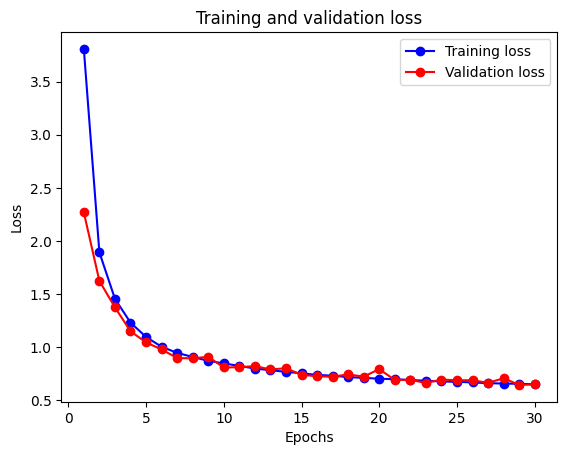

In [24]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-o', label='Training loss')
plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Si bien esta vez parece que la función de pérdida para el conjunto de validación es más estable y mejor que en los
otros métodos, basta con fijarnos en el eje y de la gráfica para darnos cuenta que está vez se representa hasta el 
4.0. De hecho, el resultado final en validación da 0.8339, considerablemente peor que todo lo visto hasta ahora.

In [12]:

best_model = keras.Sequential()

best_model.add(layers.Input(shape=(784, )))
for i in range(2):
    best_model.add(layers.Dense(128, kernel_regularizer=regularizers.l1_l2(0.001, 0.001), activation="relu"))
best_model.add(layers.Dense(10, activation="softmax"))
opt = keras.optimizers.RMSprop(learning_rate=0.001)                        
                        
best_model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

best_model.fit(final_training_images, final_training_labels, epochs=30,verbose=1, batch_size=512)


results = best_model.evaluate(test_images, test_labels)

print(results)




Epoch 1/30
118/118 [==============================] - 1s 3ms/step - loss: 3.6102 - accuracy: 0.7120
Epoch 2/30
118/118 [==============================] - 0s 3ms/step - loss: 1.7262 - accuracy: 0.7701
Epoch 3/30
118/118 [==============================] - 0s 4ms/step - loss: 1.3246 - accuracy: 0.7821
Epoch 4/30
118/118 [==============================] - 0s 4ms/step - loss: 1.1415 - accuracy: 0.7895
Epoch 5/30
118/118 [==============================] - 0s 4ms/step - loss: 1.0226 - accuracy: 0.7992
Epoch 6/30
118/118 [==============================] - 0s 3ms/step - loss: 0.9478 - accuracy: 0.8029
Epoch 7/30
118/118 [==============================] - 0s 3ms/step - loss: 0.8915 - accuracy: 0.8093
Epoch 8/30
118/118 [==============================] - 0s 3ms/step - loss: 0.8554 - accuracy: 0.8110
Epoch 9/30
118/118 [==============================] - 0s 3ms/step - loss: 0.8283 - accuracy: 0.8151
Epoch 10/30
118/118 [==============================] - 0s 3ms/step - loss: 0.8088 - accuracy: 0.8173

### Resultados de la batch normalization

Es fácil ver que la accuracy obteniendo es la peor hasta el momento (0.8151, mientras que la del modelo sin regularización es 0.8789). Por ende, podemos concluír con que este es el peor método de normalización de entre
los 3 probados.

## Conclusiones regularización

Ninguno de los modelos ha sido capaz de obtener valores de precisión sustancialmente mejores al modelo base. Esto 
es lógico, ya que el dataset Fashion-MNIST no suele dar problemas de overfitting. Por ende, podemos determinar que, si bien la regularización resulta útil es muchos dominios, este no es uno de ellos.
